# Analysis on California Motor Vehicle Traffic Collisions during 2019

In [2]:
from IPython.core.display import Image
import pandas as pd
import plotly.graph_objects as go

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import json

# our own package
from analysis.analysis import day_of_month
from analysis.analysis import time_of_day

# relative path to data & figures directory
from analysis.paths import DATA_PATH, FIGURES_PATH

## Introduction

This study analyzes the potential trends in car collision to inform further research. We are interested to see if different factors such as day of month, time of day, location, and population each has impact on the count, frequency, and extent to which traffic collisions happen. The data used is from the California Highway Patrol SWITRS 2019 Report on Fatal and Injury Motor Vehicle Traffic Collisions. The dataset contains a variety of information and we will only be working with a selected subset of it. For information about the complete dataset, please refer to [this](https://www.chp.ca.gov/programs-services/services-information/switrs-internet-statewide-integrated-traffic-records-system/switrs-2019-report).

## Section 1: Do the Number of Car Crashes in California Differ by Day of Month?

### Motivation

We want to examine whether or not there is some sort of seasonality with regards to car crashes; that is, is there a difference in the level of car crashes based on the day of the month (i.e., does the beginning of the month have more car crashes?), or based on the month of the year (i.e., do winter months correspond to more car crashes)? 

This could provide some insight into whether or not some trends exist that could explain any underlying differences in the average number of car crashes. For instance, are winter months more dangerous due to colder weather? 

### 1.1 Some initial attempt to visualize

Our first attempted to visualize the data was by stuffing everything on a graph. We plotted the number of collisions that happened on each day of a month for all 12 months on a single line plot, as shown below.

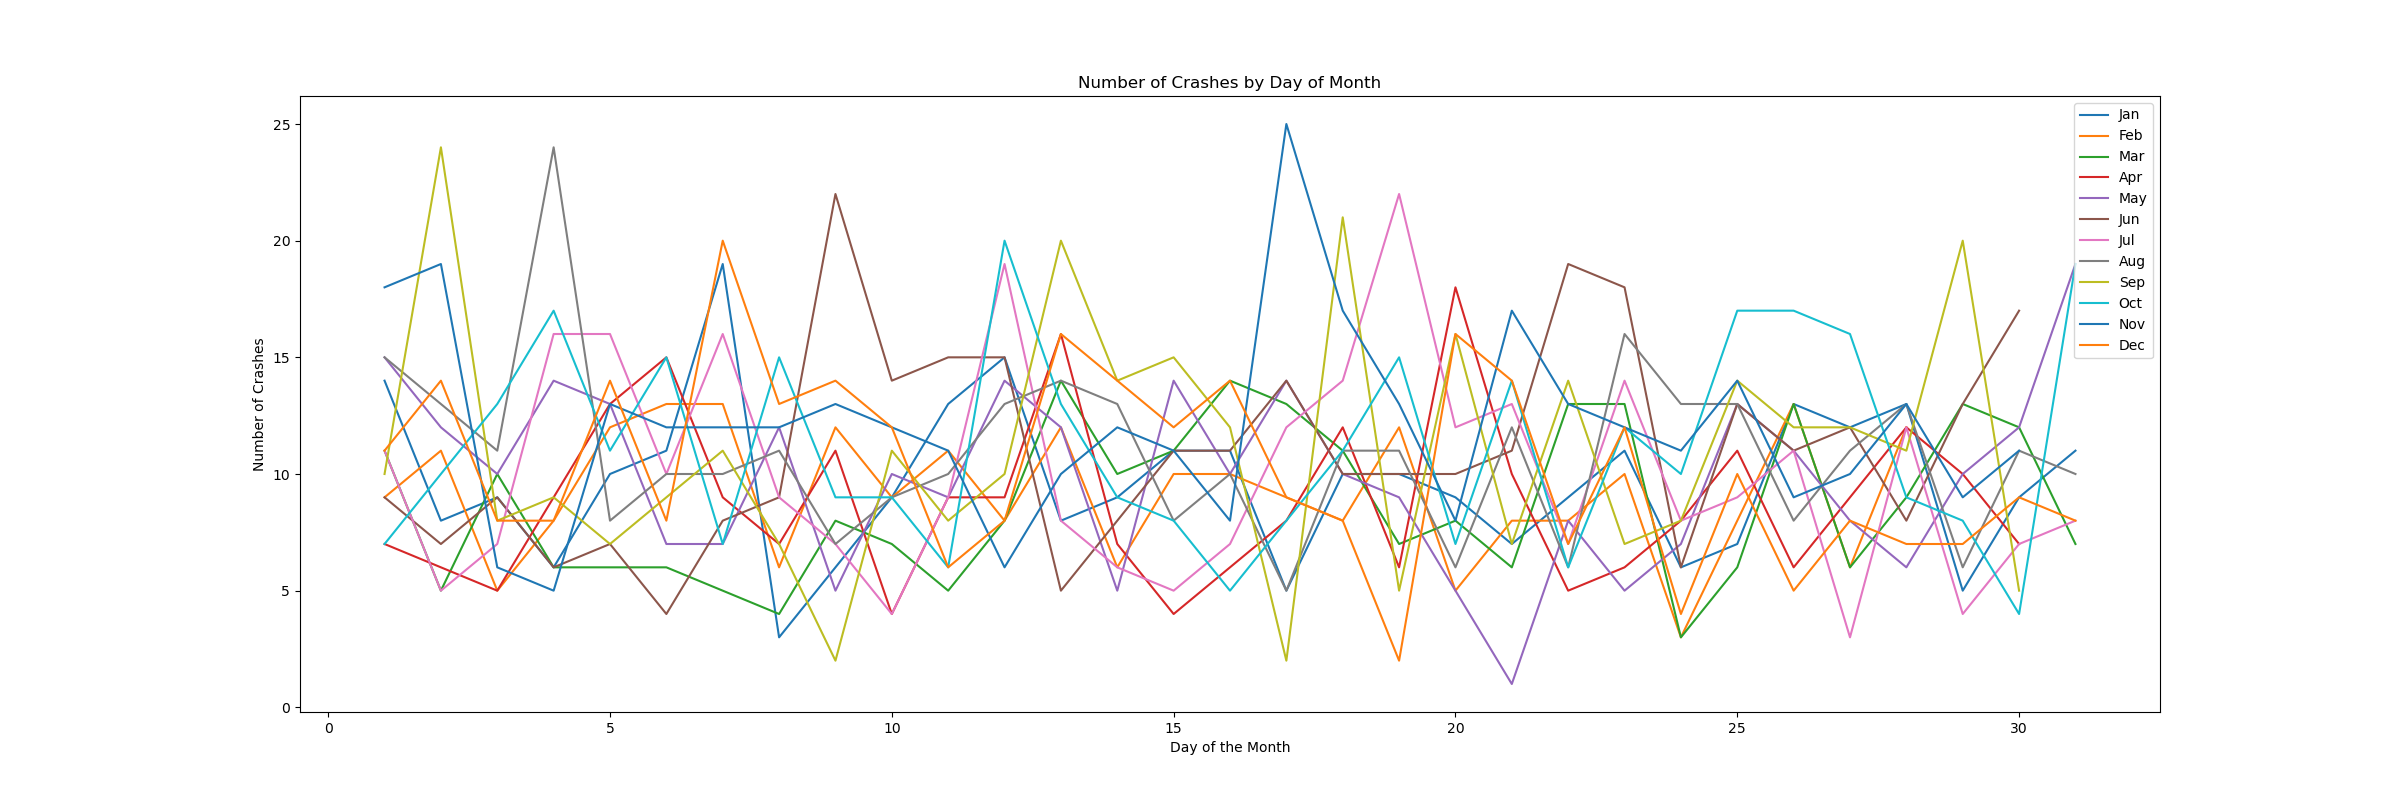

In [2]:
Image("figures/fatal_crashes_by_day_of_month.png")

As we can see, our data is quite messy when plotted as is! This is a big reason why we want to group our data and use a difference in means calculation.

### 1.2 Seasonality Analysis for Day of Month

Next, we tried to improve and took a step further by analyzing the seasonality of the colission count. We first examine the seasonality based on day of month.

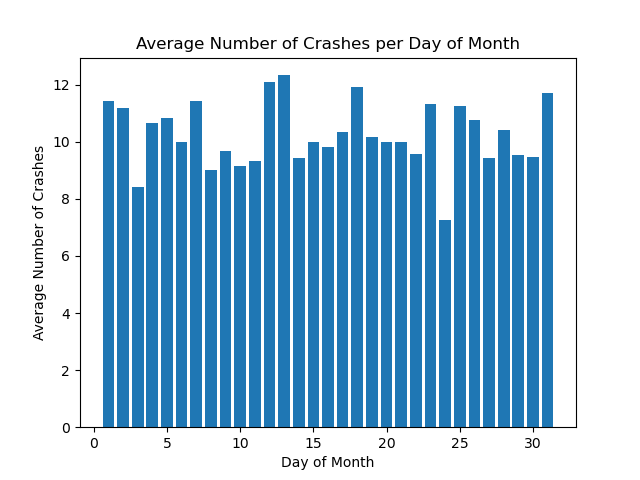

In [3]:
Image("figures/avg_fatal_crashes_by_day_of_month.png")

To decide whether or not the means of each day of the month's car crashes are different, we can employ the Kruskal-Wallis test. The Kruskal-Wallis test is a nonparametric test--meaning we make no assumptions about the distributions of our observations--that allows us to test if the means of each of our groups are the same. The only assumptions made with the Kruskal-Wallis test is that we have independent observations; that is, car crashes are independent of one another. For the most part, this seems like a reasonable assumption, considering that a car crash happening somewhere in LA doesn't affect one in SF. Naturally, there are exceptions (i.e., a pileup), but we will consider this assumption on the macro scale to be feasible.

$H_0$: The population mean of each group is the same (the day of month doesn't change the number of car crashes)<br>
$H_1$: The population mean of each group is different (the day of month does change the number of car crashes)

With a p-value of 0.456, we fail to reject our null hypothesis, which means that we believe that our means are the same, and that the day of month doesn't change the number of car crashes. 

### 1.3 Seasonality Analysis by Month

We now examine whether or not there is a difference based on the month of the year.

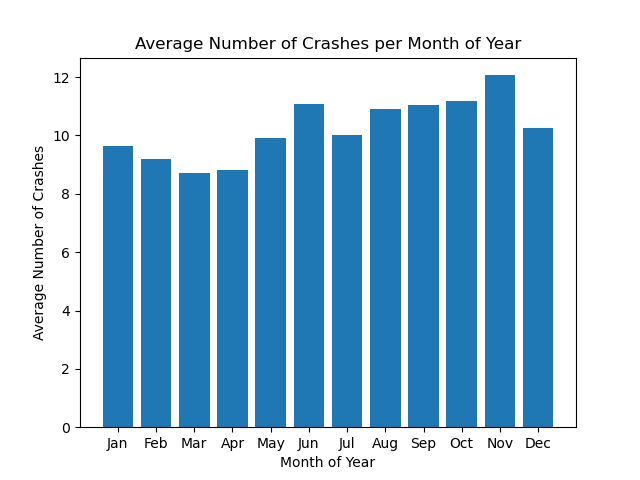

In [4]:
Image("figures/avg_fatal_crashes_per_month.png")

Again, we will run the Kruskal-Wallis test for differences of means since we are operating under the same assumptions as previously outlined.

With a p-value of 0.443, we fail to reject our null hypothesis, which means that we believe that our means are the same, and that the month of year doesn't change the number of car crashes. 

## Conclusions

We showed there is no seasonality trend for day of month and month of year when it comes to car crashes. To see any type of seasonality trend, we would likely need to observe more granular data (perhaps day of week or time of day). 

## Section 2: Do the Number of Car Crashes in California Differ by Time of Day?

We wanted to examine the effects of time on the number of car crashes in California. First, we analyze the data by hour of day to see if there are common trends that we can see for the number of fatal crashes. We will also look at the injury crashes based on the hour of day and day of week. It would be unsurprising to see peaks during certain hours of the day due to environmental circumstances. Let us first see what hours of the day may lead to more crashes. 

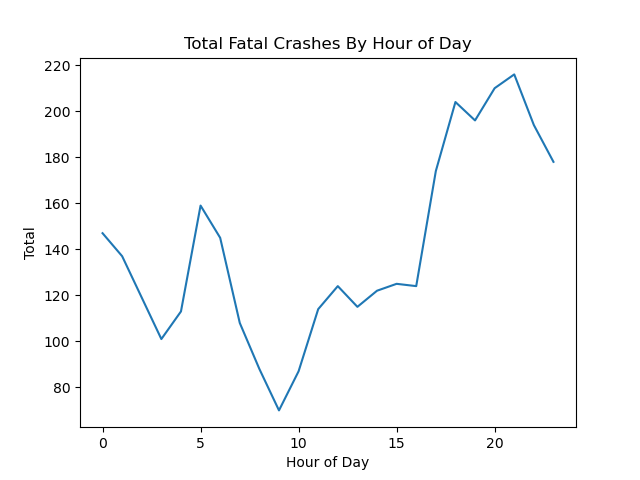

In [12]:
Image("figures/avg_fatal_crashes_by_hour.png")

Looking at the graph above, we see that the peak number of fatal crashes is late at night near 9:00 PM, which could be the result of reckless driving during the night when people may have a harder time seeing, excessive speeding, or drowsy driving. 

The lowest peak in the graph lies around 9:00 AM, which could be the result of traffic jams where people are unable to drive recklessly or quickly. Therefore, the number of injury crashes could be higher than the number of fatal crashes.  

Now, we will look at the number of injury crashes by hour of day and day of week. We may see similar patterns in the graph with the number of fatal crashes for the hour of day. This could be the result of the aforementioned conditions where there is more reckless driving during the night. As for the day of the week, there could be less injury crashes on the weekend as people may be less tired from waking up early or driving back late from work.

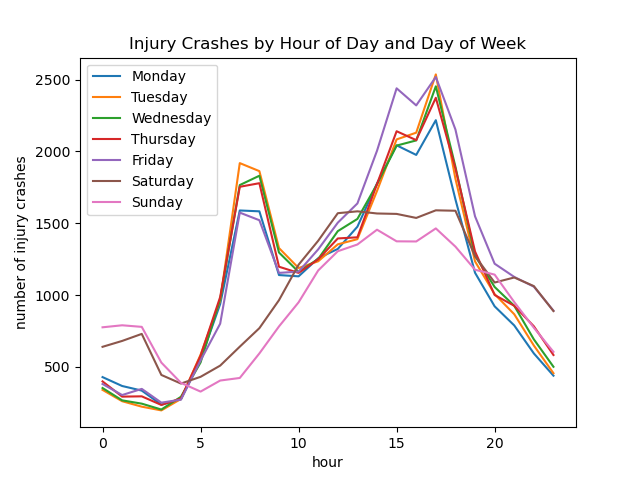

In [3]:
Image("figures/injury_crashes_by_hour_and_day_of_week.png")

We see that weekdays have very similar patterns, with peaks at major commute times in the morning at around 7-8 AM, and in the afternoon around 5 PM, which is also just the peak commute times due to people's 9-5 jobs. However, we notice that Mondays and Fridays seem to have lower number of injury crashes in the morning, perhaps because there is less traffic closer to the weekend. Friday also seems to have more crashes in the afternoon, which could be due to drivers' fatigue or rush to get home early for the weekend.

The weekend injury crashes pattern also seems to reflect the average person's travel patterns. It seems most people go out later and return home later on weekends, but on average there seem to be fewer crashes since there are fewer cars on the road.

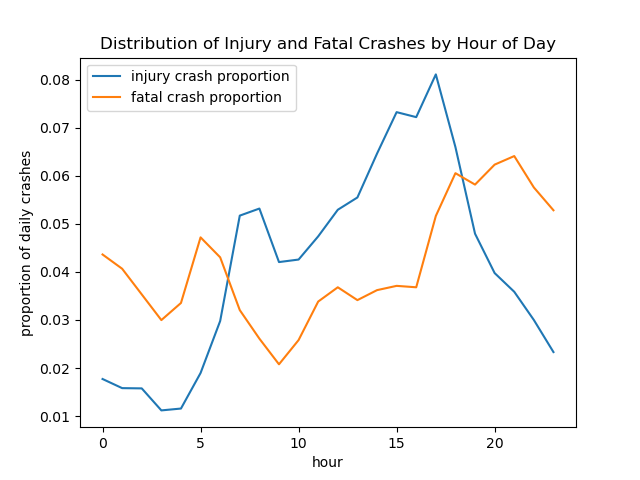

In [14]:
Image("figures/injury_vs_fatal_hourly.png")

Interestingly, we see that fatal crashes and injury crashes do not have peaks at the same time. Injury crashes seem to occur around peak commute times, but fatal crashes are slightly offset from these peaks (earlier in the morning, and later in the afternoon). This is likely because heavy traffic jams and slow speeds make it more unlikely that a crash would result in a fatality.

### Comparing Daily Trends

We will now use a Chi-Square test to compare crash patterns as a function of time-of-day, between different days of the week. 

First, we will look at the injury crashes on Saturday and Sunday as well as Tuesday and Wednesday to see if there is a large difference in patterns. 

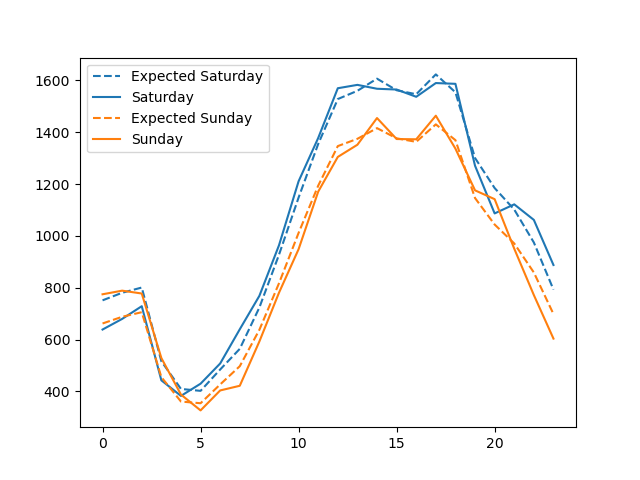

In [15]:
Image("figures/hourly_injury_saturday_vs_sunday.png")

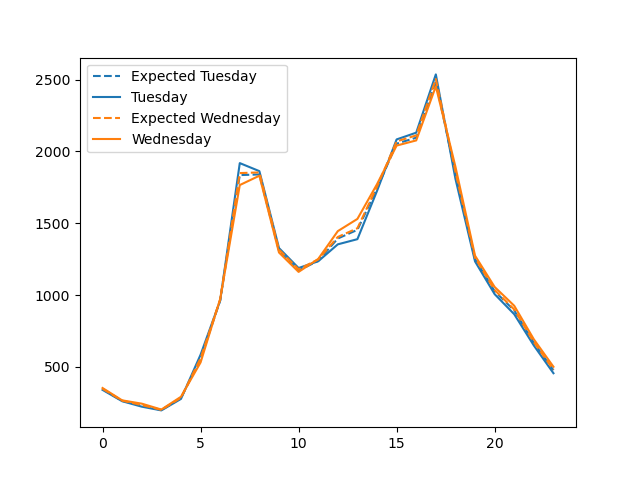

In [16]:
Image("figures/hourly_injury_tuesday_vs_wednesday.png")

We can clearly see that there is a difference between the pattern of injury crashes on Saturday and Sunday. The higher number of injury crashes on Saturday versus Sunday could result from more traveling and cars on the streets during the first day of the weekend whereas most people would spend their Sunday relaxing at home.

From the graph right above, there does not seem to be a significant difference between the pattern for injury crashes on Tuesday and Wednesday. Tuesday and Wednesday also seem to have similar patterns in for the number of injury crashes for the hour of day.

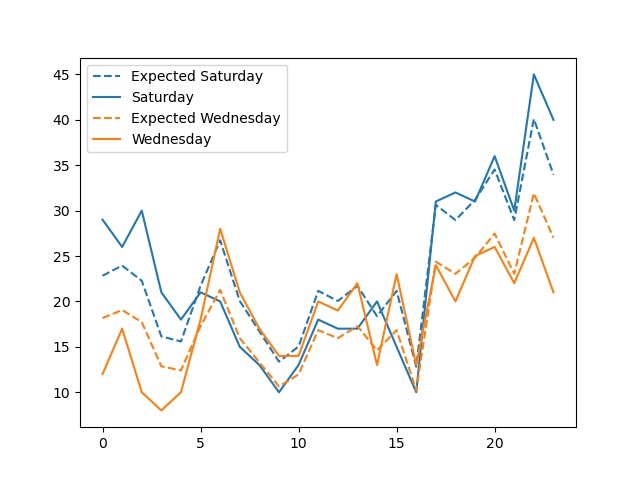

In [17]:
Image("figures/hourly_fatal_saturday_vs_wednesday.png")

Looking at Wednesday and Saturday's patterns, we see that there is a significant difference in the expected versus actual data. In addition, each day's patterns are very different from one another. There would be differences in traffic patterns during the weekday and the weekend, so this is not an unexpected outcome. For instance, there may be more people traveling later in the night on the weekend that results to a higher number of crashes.

## Conclusions

Based on the hour of day analysis, we see that there is a common trend of high peaks of fatal crashes during the nighttime. However, for injury crashes, the cases seem to lie around traffic hour times. We can see this clearly through the Distribution of Injury and Fatal Crashes by Hour of Day. 

Based on the following analysis above, using a significance level of $\alpha=0.05$, we find that there is a significant difference between the pattern for injury crashes on Saturday and Sunday, but not a significant difference in the pattern between Tuesday and Wednesday. We also find significant difference between Tuesday and Thursday's patterns.

For fatal crashes, we once again find no signficant difference between Tuesday and Wednesday patterns. But we do find a difference between Saturday and Wednesday. Since there are fewer fatal crashes than injury crashes, we do seem to see slightly higher p-values.

## Section 3: Geographical Factor Analysis - Locations & Population

Next, we examined the impact of some geographical factors on traffic collisions. Given that our dataset contains plenty of county-level data on traffic collisions statistics, we used the python `plotly` package to create a few choropleth maps to illustrate how different metrics distribute across different counties in California.

In [18]:
def plot_choroplethmap(counties, fips, value, value_min, value_max, text, title):
    fig = go.Figure(go.Choroplethmapbox(geojson=counties, locations=fips, z=value,
                                    colorscale="Viridis", zmin=value_min, zmax = value_max,
                                    marker_opacity=0.8, marker_line_width=1, 
                                    text=text))

    fig.update_layout(mapbox_style="carto-positron",
                      mapbox_zoom=4.3, mapbox_center = {"lat": 37.5, "lon": -120})
    fig.update_layout(margin={"r":150,"t":30,"l":150,"b":0}, 
                      title={"text":title})
    fig.show()

In [19]:
# Load in the pandas dataframe generated in the County_Analysis Notebook
county_data_2019 = pd.read_csv("data/county_data_2019.csv", dtype={"fips":str}, index_col=0)

# Load in the json object that stores geometrical shape of each county
counties = json.load(open("data/CA-flips.json"))

Displayed below is the first 10 rows of the main dataframe that contains all of the county-level data that this part of the analysis depends on. The dataframe was collected in 2019. Each row of the dataframe corresponds to a county in California county (58 in total). Here's an overview of what each column represents:

- `County`: name of the county
- `fips`: the fips code that uniquely identify each county in the US
- `Population`: the population of the county in 2019
- `Total Crashes`: the total number of traffic collisions
- `Total Fatal`: the number of people killed in collisions
- `Total Injury`: the number of people injured in collisions
- `Alcohol Involved Crashes`: the number of alcohol-involved collisions
- `Alcohol Involved Fatal`: the number of people killed in alcohol-involved collisions
- `Alcohol Involved Injury`: the number of people injured in alcohol-involved collisions
- `Crashes per 1000 capita`: the number of collisions per 1000 capita
- `Overall Fatal Rate`: the overall ratio of people killed to total number of collisions
- `Alcohol Involved Fatal Rate`: the overall ratio of people killed to total number of collisions


In [20]:
# Display the first 10 rows of the county dataset
county_data_2019.head(10)

,County,fips,Population,Total Crashes,Total Fatal,Total Injury,Alcohol Involved Crashes,Alcohol Involved Fatal,Alcohol Involved Injury,Crashes per 1000 capita,Overall Fatal Rate,Alcohol Involved Fatal Rate
0,Alameda,06001,1668965,22768,96,10441,469,28,655,13.641988,0.421644,5.970149
1,Alpine,06003,1123,77,2,66,1,0,4,68.566340,2.597403,0.000000
2,Amador,06005,37724,521,16,276,29,4,38,13.810837,3.071017,13.793103
3,Butte,06007,214532,2226,34,1262,130,9,143,10.376074,1.527403,6.923077
4,Calaveras,06009,44403,598,11,305,44,4,45,13.467558,1.839465,9.090909
5,Colusa,06011,22045,352,12,205,22,1,21,15.967340,3.409091,4.545455
6,Contra Costa,06013,1147269,12195,77,5982,383,27,492,10.629591,0.631406,7.049608
7,Del Norte,06015,27207,285,11,217,20,1,19,10.475245,3.859649,5.000000
8,El Dorado,06017,188818,1644,29,861,96,11,103,8.706797,1.763990,11.458333
9,Fresno,06019,1018437,7848,135,4247,297,34,305,7.705926,1.720183,11.447811


### 3.1 Collision Count by County

Firstly, we think it would be nice to get a general idea of the geographical distribution of traffic collisions across the counties. The choroplethmap below displays the total number of collisions that happened in each county in 2019.

**IMPORTANT: Uncomment the commented code to generate the more interactive plot!!!**

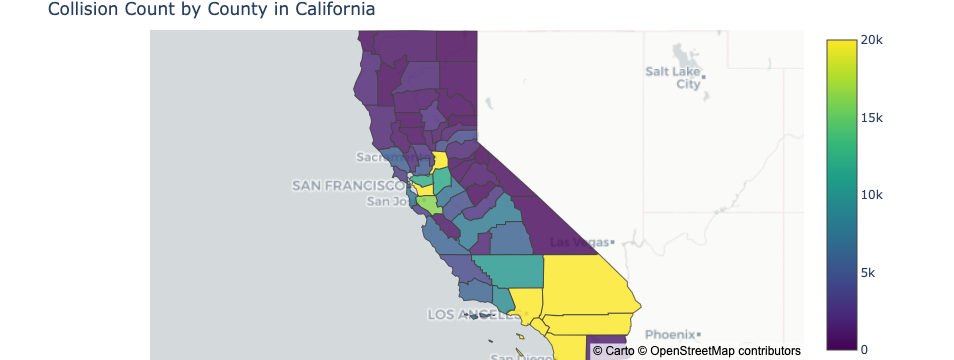

In [5]:
# IMPORTANT: Comment and Run the following code for the interactive plot
# plot_choroplethmap(counties=counties, 
#                    fips=county_data_2019["fips"], 
#                    value=county_data_2019["Total Crashes"].tolist(), 
#                    value_min=0, 
#                    value_max=20000, 
#                    text=county_data_2019["County"].tolist(), 
#                    title="Collision Count by County in California")
Image("figures/choro3_1.png")

Looking at the plot, the number of collisions tend to be higher in states with larger population. This makes sense because larger population usually means larger driving population, which then leads to more accidents. This is illustrated by the scatter plot below, which plots the log of collision count against the log of population for each county. As earlier speculated, there's a clear positive correlation between the two.

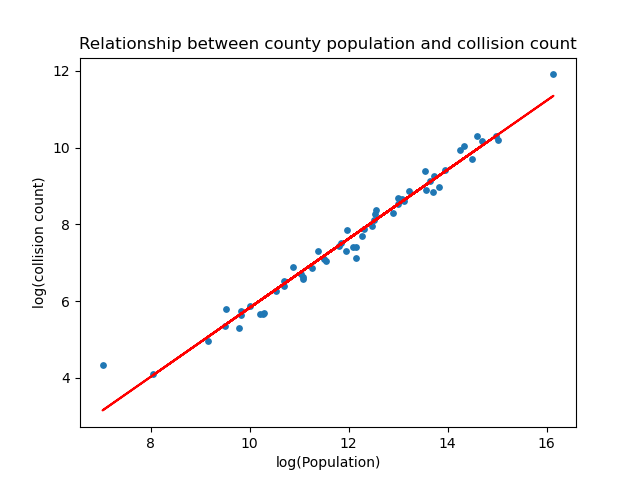

In [22]:
Image("figures/scatter3_1.png")

### 3.2 Collision Frequency by County

Since it's expected for total collision count to go up as population increases, we wanted to take away the effect of population. As a result, we created a second choroplethmap to show the the collision frequency of each county, with frequency defined as the **number of collision per 1000 capita** in each county.

**IMPORTANT: Uncomment the commented code to generate the more interactive plot!!!**

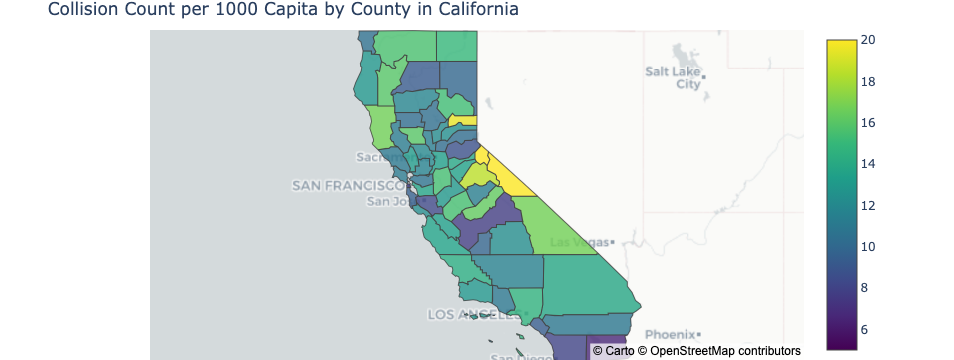

In [7]:
# IMPORTANT: Comment and Run the following code for the interactive plot
# plot_choroplethmap(counties=counties, 
#                    fips=county_data_2019["fips"], 
#                    value=county_data_2019["Crashes per 1000 capita"].tolist(), 
#                    value_min=5, 
#                    value_max=20, 
#                    text=county_data_2019["County"].tolist(), 
#                    title="Collision Count per 1000 Capita by County in California")
Image("figures/choro3_2.png")

Surprisingly, the distribution of collision frequency is quite different from that of the collision count. We can see that the high-population counties no longer stand out in this plot, and high frequencies tend to have shifted towards the central and even northern counties. However, the choroplethmap is not exactly clear on the underlying pattern, so we further plotted the relationship between population and collision frequency in a scatter plot, as shown below.

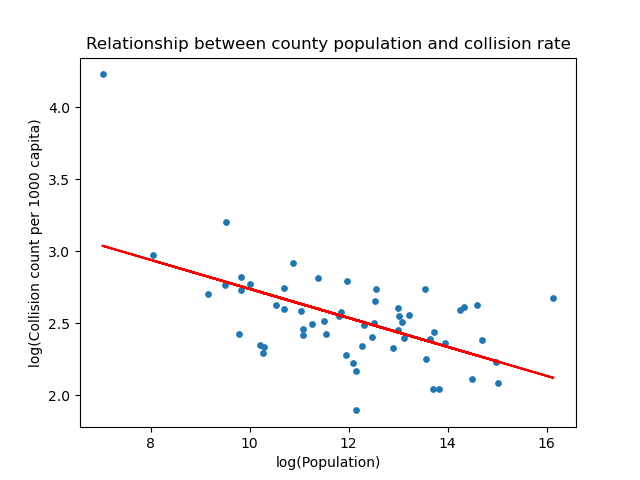

In [17]:
Image("figures/scatter3_2.png")

In fact, we can see that population and collision frequency are negatively correlated, which is the exact opposite of what we initially expected! We would naturally think more densely populated area will have higher chance of collisions but apparently this is not the case. One of the possible explanation of this phenomenon could be that in densely populated regions people are forced to drive slower while in sparsely populated areas people will drive more recklessly because there are less cars on the road.

### 3.3 Collision Fatal Rate by County

Following up on the collision frequency of each county, we decided to further examined how population relates to how fatal the collisions are. Below is a third choroplethmap on the fatal rate of collision in each county, where the **fatal rate is calculated by dividing the number of people killed in collision in each county by the total number of collisions that happened in the county**.

**IMPORTANT: Uncomment the commented code to generate the more interactive plot!!!**

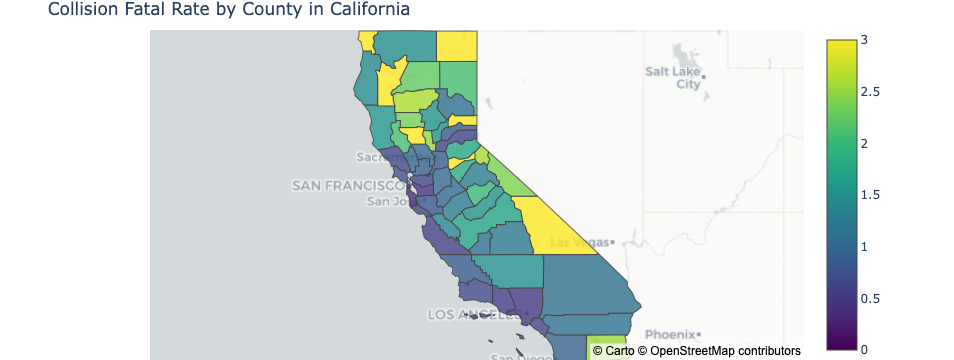

In [8]:
# IMPORTANT: Comment and Run the following code for the interactive plot
# plot_choroplethmap(counties=counties, 
#                    fips=county_data_2019["fips"], 
#                    value=county_data_2019["Overall Fatal Rate"].tolist(), 
#                    value_min=0, 
#                    value_max=3, 
#                    text=county_data_2019["County"].tolist(), 
#                    title="Collision Fatal Rate by County in California")
Image("figures/choro3_3.png")

Once again, we do not see highly populated county such as Alameda, Los Angeles, and San Diego county stand out at all in fatal rate. Instead, similar to the collision frequency in the previous plot, sparsely populated counties tend to have more deadly collisions on average. Once again, this can come down to the difference in driving speed and driving habit between urban and rural areas.

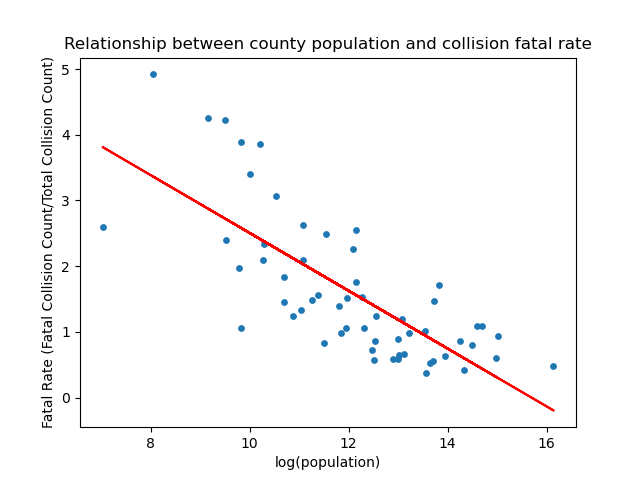

In [19]:
Image("figures/scatter3_3.png")

As expected, the scatter plot shows a negative correlation between population and fatal rate.

## Bonus Section: Alcohol

Lastly, we want to address our curiosity on, although commonly agreed, how much alcohol usage actually impacts traffic collision. We created a boxplot to compare side-by-side the distribution of the overall fatal rate against the fatal rate of only alcohol-involved collisions. From the plot, we can see the overall FR averages slightly over 1 percent while its counterpart averages around 8 percent. Our result confirmed the common belief: drinking alcohol greatly increases the severity of the collisions, which makes sense because intoxicated drivers are usually way out of control of the situation.

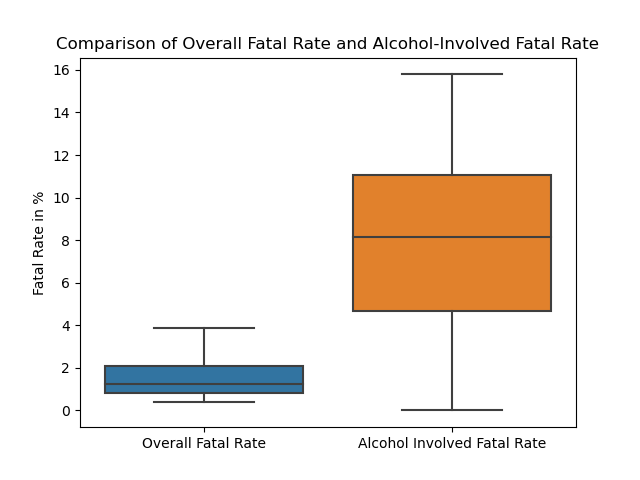

In [20]:
Image("figures/boxplot3_4.png")

## Conclusion
We found that although collision count goes up when population increases, the actual collision frequency and severity are in fact lower in densely populated counties. Last but not least, we confirmed the common belief that alcohol usage does have a very dramatic event on worsening the damage of a collision.

## Author Contributions

Nick: Completed day_of_month analysis, made utils and testing files for both day_of_month and time_of_day analysis, wrote part of README, wrote part of environment.yml

Leah: created and completed the Makefile, wrote part of the README, wrote part of the day_of_month analysis, and added transitions/descriptions to Section 2 of the main notebook 

Jeffrey: created county and alcohol analysis, compiled the main notebook

Janise: did part of time_of_day analysis and hypothesis testing, set up jupyterbook and binder, and environment bugfixes